<a href="https://colab.research.google.com/github/Juanete0809/ML_Projects/blob/main/Classification/1%20-%20Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

Here we have a binary clasification problem. The objective is to detect possible credit card fraud events.

We will use different aproaches and compare them.

# Step 1: Load Dataset and perform EDA

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Machine Learning Projects/2 - Credit Card Fraud Detection/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Che for null values

In [5]:
df.isnull().values.any()

False

In [6]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
not_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = fraud / (fraud + not_fraud) * 100

print(f'There are {fraud} cases in the dataset')
print(f'The percentage of fraud ocurrences is {round(fraud_percent,4)}%')

There are 492 cases in the dataset
The percentage of fraud ocurrences is 0.1727%


Plot with Matplotlib

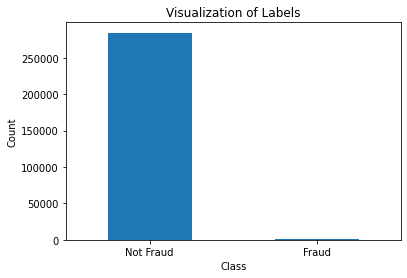

In [8]:
count_classes = df.value_counts(df['Class'], sort= True)
labels = ['Not Fraud', 'Fraud']

count_classes.plot(kind = 'bar', rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

Scale the "Amount" column

In [9]:
scaler = StandardScaler()

df['New_amount'] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))

df.drop(['Amount','Time'], inplace = True, axis = 1)

In [10]:
Y = df["Class"]
X = df.drop(["Class"], axis= 1)

# Step 2: Training and Test the Models

Splitting into train and test datasets

In [11]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


This is actually a binary classification problem as we have to predict only 1 of the 2 class labels. We can apply a variety of algorithms for this problem like Random Forest, Decision Tree, Support Vector Machine algorithms, etc.

In this machine learning project, we build Random Forest, Decision Tree and Logistig Regression classifiers and see which one works best. We address the “class imbalance” problem by picking the best-performed model.

## 2.1. Decision Tree

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

We will perform the training with 2 metrics: 

* **Gini Index:** metric to measure how often a randomly chosen element would be incorrectly identified. It means an attribute with lower gini index should be preferred).
* **Entropy:** measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The higher the entropy the more the information content.


In [13]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [14]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [15]:
# Driver code
def main():
      
    # Building Phase
    clf_gini = train_using_gini(train_X, test_X, train_Y)
    clf_entropy = tarin_using_entropy(train_X, test_X, train_Y)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(test_X, clf_gini)
    cal_accuracy(test_Y, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(test_X, clf_entropy)
    cal_accuracy(test_Y, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[1 0 0 ... 0 0 0]
Confusion Matrix:  [[85277    30]
 [   32   104]]
Accuracy :  99.92743700478681
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.76      0.77       136

    accuracy                           1.00     85443
   macro avg       0.89      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Results Using Entropy:
Predicted values:
[1 0 0 ... 0 0 0]
Confusion Matrix:  [[85272    35]
 [   20   116]]
Accuracy :  99.93562960102057
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.77      0.85      0.81       136

    accuracy                           1.00     85443
   macro avg       0.88      0.93      0.90     85443
weighted avg       1.00      1.00      1.00     85443



We can see that using Entropy we have better classification results. Next I'll plot that confusion Matrix, just by fun:

Predicted values:
[1 0 0 ... 0 0 0]


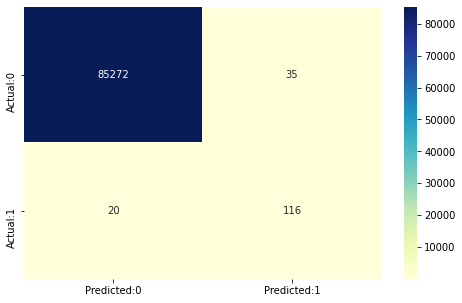

In [18]:
clf_entropy = tarin_using_entropy(train_X, test_X, train_Y)
y_pred_entropy = prediction(test_X, clf_entropy)

cm = confusion_matrix(test_Y,y_pred_entropy)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)

In [19]:
print(f'Sensitivity = {round(sensitivity,3)}')
print(f'Specificity = {round(specificity,3)}')
print('Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity))
print('Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

Sensitivity = 0.853
Specificity = 1.0
Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  2078.9100840337283
Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.1471191840090948


## 2.2. Random Forest

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [22]:
classifier = RandomForestClassifier(n_estimators=100) # Create the classifier

classifier.fit(X_train, Y_train) # Train it

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
Y_pred = classifier.predict(X_test) # Predict outputs

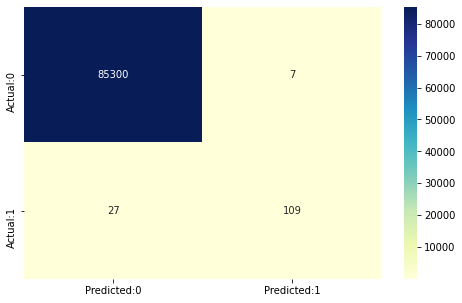

In [24]:
cm2 = confusion_matrix(Y_test,Y_pred)

conf_matrix2 = pd.DataFrame(data=cm2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix2, annot=True,fmt='d',cmap="YlGnBu");

TN2 = cm2[0,0]
TP2 = cm2[1,1]
FN2 = cm2[1,0]
FP2 = cm2[0,1]

sensitivity2 = TP2/float(TP2+FN2)
specificity2 = TN2/float(TN2+FP2)

In [25]:
print(f'Sensitivity = {round(sensitivity2,3)}')
print(f'Specificity = {round(specificity2,3)}')
print('Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity2/(1-specificity2))
print('Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity2)/specificity2)

Sensitivity = 0.801
Specificity = 1.0
Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  9767.293067224788
Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.1985457037445693


This results are pretty good, but we'll see if we can improve it. We will check the importance of the different variables used in the prediction and try to discard them.

In [ ]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

feature_importances_df

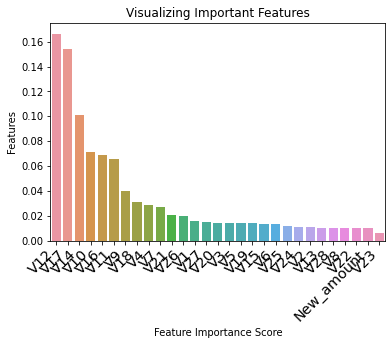

In [27]:
# Vasualization

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.show()

We're discarding the variables that have an importance of less than 0.013

In [32]:
# cargar datos con características seleccionadas
X_new = df.drop(["V2", "V25", "V24", "V13", "V28", "V8", "V22", "V23", "New_amount", "Class"], axis=1)
y_new = df["Class"]

# estandarizar el conjunto de datos
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X_new)

# dividir en conjunto de entrenamiento y de prueba
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_scaled_new, y_new, stratify=y_new, test_size=0.3, random_state=42)

In [33]:
# New Classificator
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train_n, y_train_n)

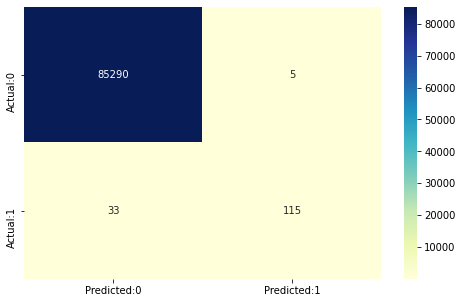

In [43]:
Y_pred_n = clf.predict(X_test_n) # Predict outputs

cm3 = confusion_matrix(y_test_n,Y_pred_n)

conf_matrix3 = pd.DataFrame(data=cm3,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix3, annot=True,fmt='d',cmap="YlGnBu");

TN3 = cm3[0,0]
TP3 = cm3[1,1]
FN3 = cm3[1,0]
FP3 = cm3[0,1]

sensitivity3 = TP3/float(TP3+FN3)
specificity3 = TN3/float(TN3+FP3)

In [44]:
print(f'Sensitivity = {round(sensitivity3,3)}')
print(f'Specificity = {round(specificity3,3)}')
print('Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity3/(1-specificity3))
print('Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity3)/specificity3)

Sensitivity = 0.777
Specificity = 1.0
Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  13255.304054050299
Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.2229860444334592


It seems that by deleting some variables we make the model perform worse than before...

## 2.3. Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
X_train_l, X_test_l, Y_train_l, Y_test_l = train_test_split(X, Y, test_size= 0.3, random_state= 42)

X_train_scaled_l = scaler.fit_transform(X_train_l)

X_test_scaled_l = scaler.transform(X_test_l)

In [47]:
# Train the model

log_reg = LogisticRegression()

log_reg.fit(X_train_scaled_l,Y_train_l)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

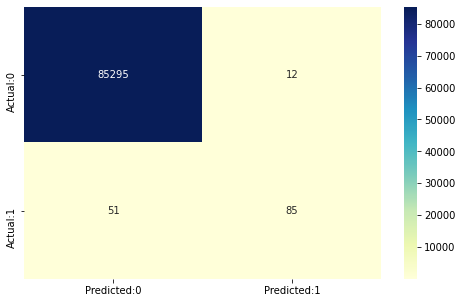

In [50]:
Y_pred_l = log_reg.predict(X_test_scaled_l)

cm4 = confusion_matrix(Y_test_l,Y_pred_l)

conf_matrix4 = pd.DataFrame(data=cm4,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix4, annot=True,fmt='d',cmap="YlGnBu");

TN4 = cm4[0,0]
TP4 = cm4[1,1]
FN4 = cm4[1,0]
FP4 = cm4[0,1]

sensitivity4 = TP4/float(TP4+FN4)
specificity4 = TN4/float(TN4+FP4)

In [51]:
print(f'Sensitivity = {round(sensitivity4,3)}')
print(f'Specificity = {round(specificity4,3)}')
print('Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity4/(1-specificity4))
print('Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity4)/specificity4)

Sensitivity = 0.625
Specificity = 1.0
Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  4443.072916666211
Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.37505275807491645


# Comparing Results

We will now see the results of the 4 different models, to see wich one performed better.

In [61]:
from prettytable import PrettyTable

summary = PrettyTable(['Model','Accuracy * 100','Specificity','Sensitivity','PLR','NLR'])
summary.add_row(['Decision Tree', round(accuracy_score(test_Y, y_pred_entropy)*100,4), round(specificity,4), round(sensitivity,4), round(sensitivity/(1-specificity),4), round((1-sensitivity)/specificity,4)])
summary.add_row(['Random Forest', round(accuracy_score(Y_test,Y_pred)*100,4), round(specificity2,4), round(sensitivity2,4), round(sensitivity2/(1-specificity2),4), round((1-sensitivity2)/specificity2,4)])
summary.add_row(['Random Forest 2', round(accuracy_score(y_test_n,Y_pred_n)*100,4), round(specificity3,4), round(sensitivity3,4), round(sensitivity3/(1-specificity3),4), round((1-sensitivity3)/specificity3,4)])
summary.add_row(['Logistic Regression', round(accuracy_score(Y_test_l,Y_pred_l)*100,4), round(specificity4,4), round(sensitivity4,4), round(sensitivity4/(1-specificity4),4), round((1-sensitivity4)/specificity4,4)])

In [62]:
print(summary)

+---------------------+----------------+-------------+-------------+------------+--------+
|        Model        | Accuracy * 100 | Specificity | Sensitivity |    PLR     |  NLR   |
+---------------------+----------------+-------------+-------------+------------+--------+
|    Decision Tree    |    99.9356     |    0.9996   |    0.8529   | 2078.9101  | 0.1471 |
|    Random Forest    |    99.9602     |    0.9999   |    0.8015   | 9767.2931  | 0.1985 |
|   Random Forest 2   |    99.9555     |    0.9999   |    0.777    | 13255.3041 | 0.223  |
| Logistic Regression |    99.9263     |    0.9999   |    0.625    | 4443.0729  | 0.3751 |
+---------------------+----------------+-------------+-------------+------------+--------+


Out of all the tests, it seems that by using a Decision Tree we get the best results. We are not as specific as the other 3 models, but we have a sensitivity rate of **85,29%** 

Since we are more interested in finding fraud cases, this last metric is the most important one, because it means that we are detecting 85,29% of the actual fraudulent cases, when the second best model (the original Random Forest) only classifies correctly 80,15% of the fraudulent cases.

In [63]:
eval_metrics_graph = pd.DataFrame({
                        'model': ['Decision Tree', 'Random Forest', 'Random Forest 2', 'Logistic Regression'],
                        'Sensitivity': [round(sensitivity,4), round(sensitivity2,4), round(sensitivity3,4), round(sensitivity4,4)]
                     })
eval_metrics_graph = eval_metrics_graph.sort_values('Sensitivity', ascending=False)

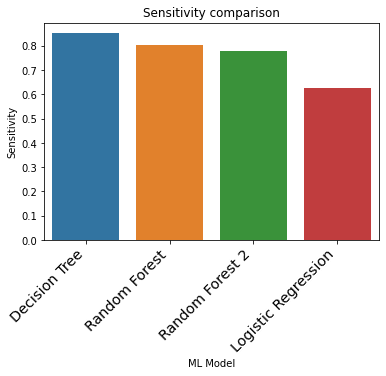

In [65]:
sns.barplot(x=eval_metrics_graph.model, y=eval_metrics_graph.Sensitivity)

plt.xlabel("ML Model")
plt.figure(figsize=(10,5), dpi=100)
plt.ylabel("Sensitivity")
plt.title("Sensitivity comparison")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.show()